#operations are performed on the clean dataset which need to be passed through the preprocess function before being passed for LDA, finally

#the data points in this dataset are results of paragraph splitting of each individual risk with ' \n\n' as the delimeter

In [7]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mousumi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mousumi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df=pd.read_csv(r'/Users/mousumi/SEC/SEC_data/1aonly22_clean.csv')

In [9]:
df.shape

(4861067, 2)

In [10]:
df.head()

Unnamed: 0                                            1a_risk
0           0  the companys business reputation results of op...
1           1  because of the following factors as well as ot...
2           2  this section should be read in conjunction wit...
3           3  the companys operations and performance depend...
4           4  the company has international operations with ...

In [11]:
df.drop(['Unnamed: 0'],axis =1, inplace=True)

In [12]:
df.head(1)

1a_risk
0  the companys business reputation results of op...

#use a preprocessing function to remove the stopwords and tokenize the data in the 1a_risk column

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# nltk.download("stopwords")
# nltk.download("punkt")
# stop=list('companys company future factors required tablestart tableend able obtain additional us unable would newcompany will value information years upon company’s fiscal rate based report sales management services form costs related tax ended certain market credit products amount period net including operations securities cash time statements income section common assets shares business plan year date interest december agreement stock may financial million shall also result could results significant including tableendtablestart'.split(" "))
# stop_words = set(stopwords.words("english")+stop)

In [21]:
stop_words= ['he', "doesn't", 'him', 't', 'significant', "won't", 'y', 'business', 'products', 'm', 'himself', 're', 'also', 'years', 'statements', 'd', 'it', 'all', 'my', "weren't", 'year', 'additional', "you'll", 'against', 'factors', 'myself', 'hasn', 'just', 'date', 'unable', 'interest', 'future', "that'll", 'before', 'where', 'be', 'here', 'over', 'related', 'o', 'itself', 'who', 'what', 've', 'obtain', 'time', 'december', 'we', 'further', "hadn't", "hasn't", 'once', 'credit', 'not', 'with', 'wouldn', 'able', 'plan', 'will', 'yours', 'why', "couldn't", 'hers', 'ended', 'for', "you'd", 'than', 'you', 'amount', "you're", 'nor', 'at', 'our', 'because', 'own', 'don', 'tableendtablestart', "it's", 'both', 'each', 'more', 'through', 'above', 'financial', 'if', 'doesn', 'these', 'are', 'am', 'ourselves', "haven't", 'mustn', "mustn't", 'shares', 'so', 'ain', 'now', 'needn', "aren't", 'based', 'mightn', 'an', 'his', 'companys', 'management', 'upon', 'newcompany', 'isn', 'yourself', 'shan', 'common', 'been', 'yourselves', "mightn't", 'they', 'other', 'net', 'up', 'by', 'shall', 'how', 'was', 'when', 'report', 'haven', 'sales', 'income', 'required', 'herself', 'company', 'weren', 'i', 'should', "wouldn't", 'results', 'me', 'very', 'section', 'being', 'same', 'couldn', 'have', 'its', 'during', 'hadn', 'into', 'while', 'didn', "shan't", 'them', 'market', 'may', 'aren', 'll', 'us', "should've", "she's", "isn't", 'wasn', 'result', 'did', 'only', 'tax', 'information', 'again', 'rate', 'that', 'few', 'won', 'million', 'on', 'form', 'some', 'having', 'theirs', 'this', 'which', 'until', 'do', 'agreement', "wasn't", 'and', 'including', 'their', 'does', 'themselves', 'below', 'is', 'out', 'under', 'any', 'ma', 'costs', 'assets', 'of', "don't", 'were', 'off', 'she', 'there', 'your', "didn't", "shouldn't", 'certain', 'stock', 'no', 'as', 'period', 'securities', 'down', 'or', 'whom', "needn't", 'services', 'those', 'too', 'to', 'from', 'such', 'her', 'would', 'about', 'fiscal', 'most', 'tableend', 'tablestart', "you've", 'has', 'shouldn', 'in', 's', 'doing', 'value', 'a', 'operations', 'could', 'cash', 'ours', 'but', 'had', 'after', 'can', 'company’s', 'between', 'then', 'the']

In [22]:
def preprocess(doc):
    #stop_words= ['he', "doesn't", 'him', 't', 'significant', "won't", 'y', 'business', 'products', 'm', 'himself', 're', 'also', 'years', 'statements', 'd', 'it', 'all', 'my', "weren't", 'year', 'additional', "you'll", 'against', 'factors', 'myself', 'hasn', 'just', 'date', 'unable', 'interest', 'future', "that'll", 'before', 'where', 'be', 'here', 'over', 'related', 'o', 'itself', 'who', 'what', 've', 'obtain', 'time', 'december', 'we', 'further', "hadn't", "hasn't", 'once', 'credit', 'not', 'with', 'wouldn', 'able', 'plan', 'will', 'yours', 'why', "couldn't", 'hers', 'ended', 'for', "you'd", 'than', 'you', 'amount', "you're", 'nor', 'at', 'our', 'because', 'own', 'don', 'tableendtablestart', "it's", 'both', 'each', 'more', 'through', 'above', 'financial', 'if', 'doesn', 'these', 'are', 'am', 'ourselves', "haven't", 'mustn', "mustn't", 'shares', 'so', 'ain', 'now', 'needn', "aren't", 'based', 'mightn', 'an', 'his', 'companys', 'management', 'upon', 'newcompany', 'isn', 'yourself', 'shan', 'common', 'been', 'yourselves', "mightn't", 'they', 'other', 'net', 'up', 'by', 'shall', 'how', 'was', 'when', 'report', 'haven', 'sales', 'income', 'required', 'herself', 'company', 'weren', 'i', 'should', "wouldn't", 'results', 'me', 'very', 'section', 'being', 'same', 'couldn', 'have', 'its', 'during', 'hadn', 'into', 'while', 'didn', "shan't", 'them', 'market', 'may', 'aren', 'll', 'us', "should've", "she's", "isn't", 'wasn', 'result', 'did', 'only', 'tax', 'information', 'again', 'rate', 'that', 'few', 'won', 'million', 'on', 'form', 'some', 'having', 'theirs', 'this', 'which', 'until', 'do', 'agreement', "wasn't", 'and', 'including', 'their', 'does', 'themselves', 'below', 'is', 'out', 'under', 'any', 'ma', 'costs', 'assets', 'of', "don't", 'were', 'off', 'she', 'there', 'your', "didn't", "shouldn't", 'certain', 'stock', 'no', 'as', 'period', 'securities', 'down', 'or', 'whom', "needn't", 'services', 'those', 'too', 'to', 'from', 'such', 'her', 'would', 'about', 'fiscal', 'most', 'tableend', 'tablestart', "you've", 'has', 'shouldn', 'in', 's', 'doing', 'value', 'a', 'operations', 'could', 'cash', 'ours', 'but', 'had', 'after', 'can', 'company’s', 'between', 'then', 'the']
    stop=list('liabilities transactions acquisitions accounts risk risks companys company future factors required tablestart tableend able obtain additional us unable would newcompany will value information years upon company’s fiscal rate based report sales management services form costs related tax ended certain market credit products amount period net including operations securities cash time statements income section common assets shares business plan year date interest december agreement stock may financial million shall also result could results significant including tableendtablestart'.split(" "))
    stop_words = set(stopwords.words("english")+stop)
    #ps = PorterStemmer()
    words = word_tokenize(doc)
    #words = [ps.stem(word) for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

In [23]:
clean_list = list(df['1a_risk'])

In [24]:
len(clean_list)

4861067

In [26]:
type(clean_list[0])

str

In [28]:
processed = [lis for lis in clean_list if type(lis)==str and len(lis)>15]

In [29]:
len(processed)

4860443

In [30]:
processed_text= [preprocess(l) for l in processed[:]]

In [31]:
#!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 3.9 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for pandas>=2.0.0 from https://files.pythonhosted.org/packages/af/7b/d170f9c8306c7673f57ca4f442e326d36e20299725edc5d0af36a3e3b041/pandas-2.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.8 MB/s eta 0:00:0000:0100:01
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=6ad19d7304c6e44829e5178133f9059a5f7861c25bca2445cec9fcc338a6f0bc
  Stored in directory: /Users/mousumi/Library/Caches/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3513 sha25

In [32]:
from gensim.corpora import Dictionary

documents = processed_text  # Your list of preprocessed documents

dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

In [33]:
from gensim.models import LdaModel

num_topics = 30
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=5)

In [37]:
lda_model.save(r'/Users/mousumi/SEC/lda_model.lda')

In [38]:
lda_modell=LdaModel.load(r'/Users/mousumi/SEC/lda_model.lda')

In [34]:
topics = lda_model.print_topics(num_words=30)  # Print the top 30 words for each topic
for topic in topics:
    print(topic)

(22, '0.100*"customer" + 0.030*"new" + 0.030*"timely" + 0.019*"manner" + 0.018*"software" + 0.017*"meet" + 0.017*"system" + 0.016*"ability" + 0.016*"failure" + 0.016*"fail" + 0.015*"systems" + 0.014*"basis" + 0.012*"difficulties" + 0.012*"performance" + 0.011*"existing" + 0.010*"identify" + 0.010*"maintain" + 0.010*"open" + 0.009*"perform" + 0.009*"provide" + 0.008*"source" + 0.008*"standards" + 0.008*"must" + 0.008*"technology" + 0.008*"needs" + 0.007*"harm" + 0.007*"require" + 0.007*"experience" + 0.007*"orders" + 0.007*"order"')
(7, '0.242*"adversely" + 0.233*"affect" + 0.086*"materially" + 0.080*"condition" + 0.076*"affected" + 0.042*"ability" + 0.037*"impact" + 0.034*"negatively" + 0.025*"lack" + 0.017*"operating" + 0.011*"discussion" + 0.009*"flows" + 0.008*"impacted" + 0.007*"changes" + 0.006*"failure" + 0.006*"profitability" + 0.005*"position" + 0.003*"affecting" + 0.003*"performance" + 0.003*"otherwise" + 0.003*"significantly" + 0.003*"revenues" + 0.003*"impair" + 0.003*"analy

In [35]:
topic_assignments = [lda_model[doc] for doc in corpus]

In [44]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [45]:
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)

/Users/mousumi/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [46]:
pyLDAvis.display(prepared_data)

In [50]:
#!conda install wordcloud

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


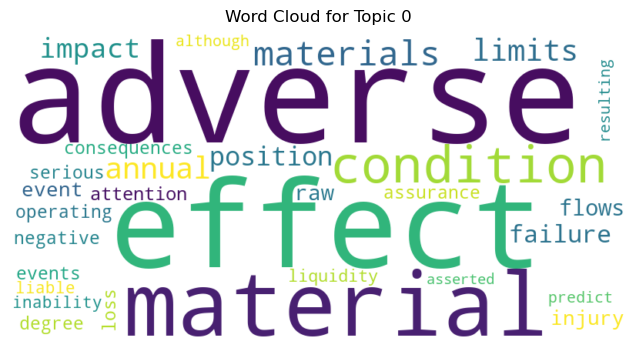

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


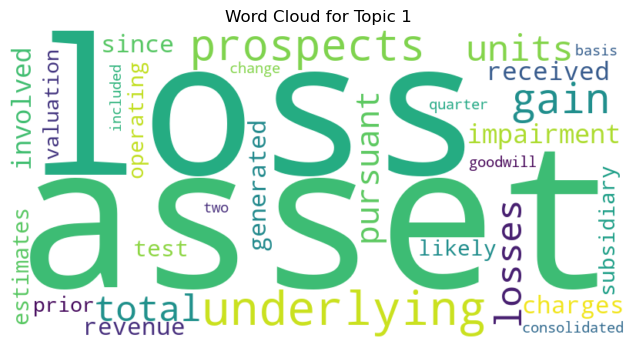

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


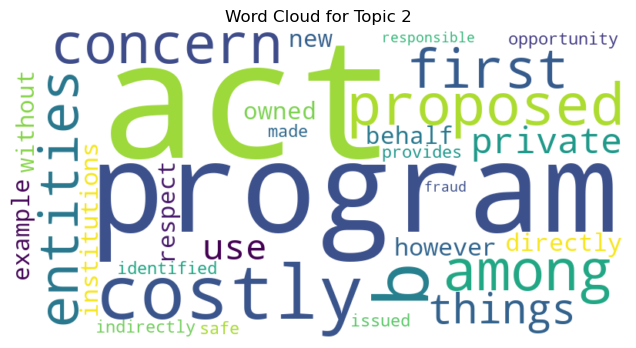

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


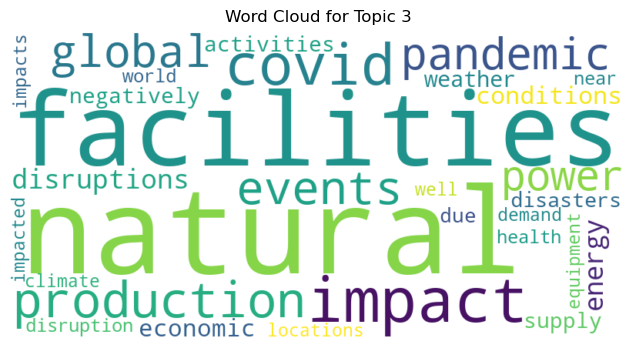

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


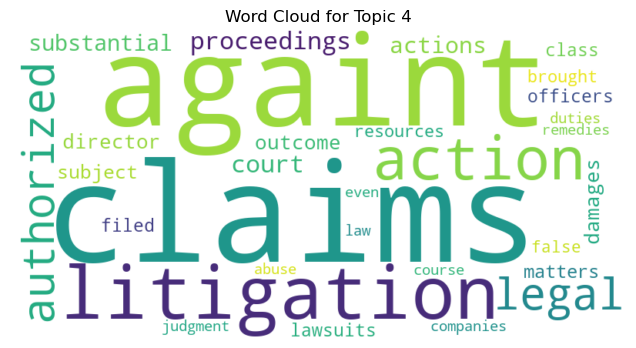

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


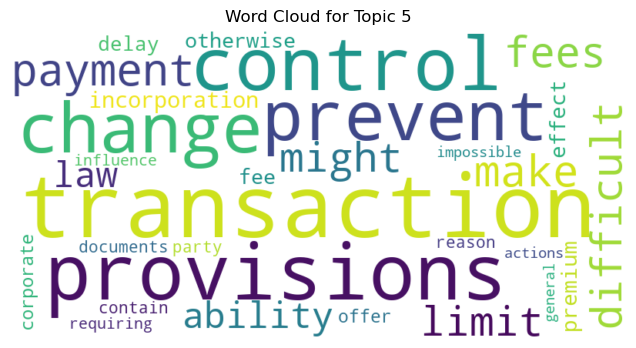

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


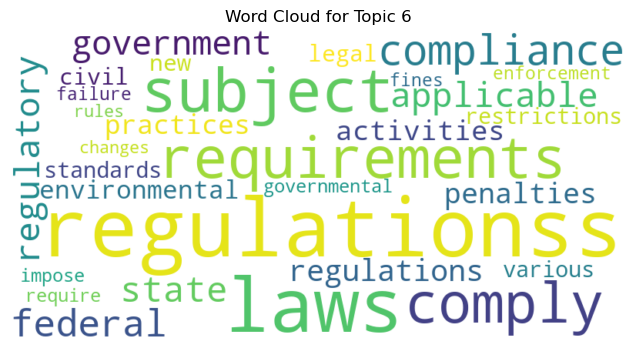

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


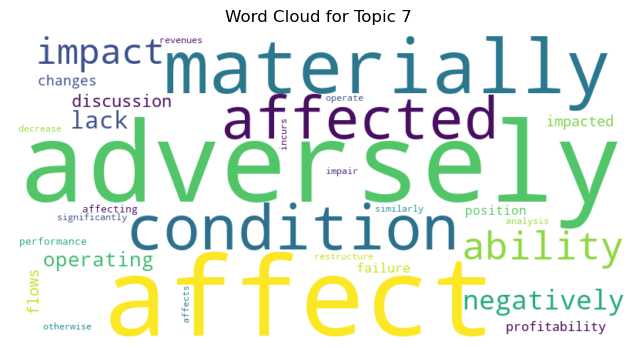

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


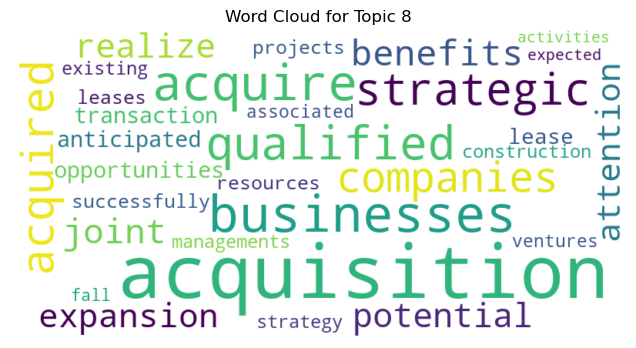

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


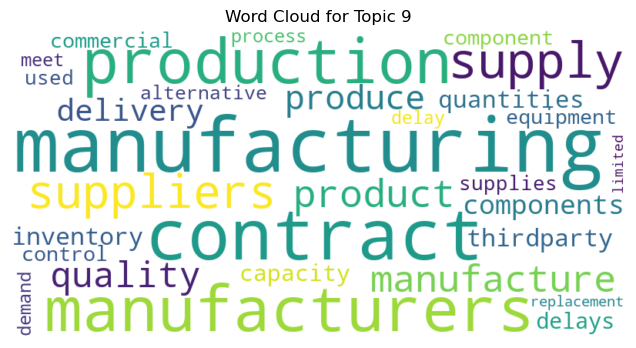

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


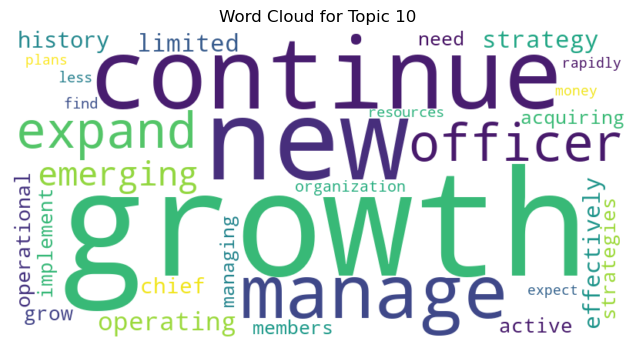

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


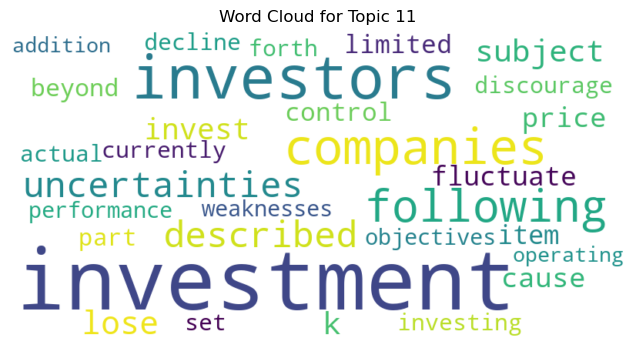

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


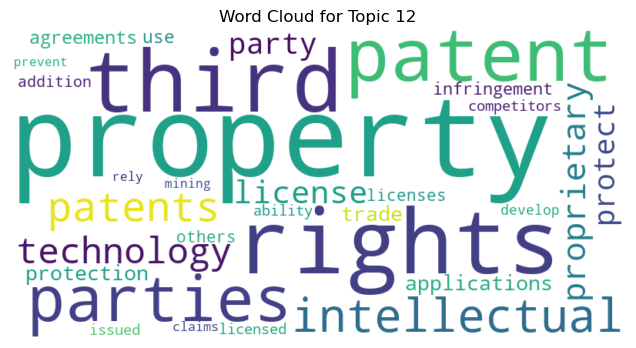

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


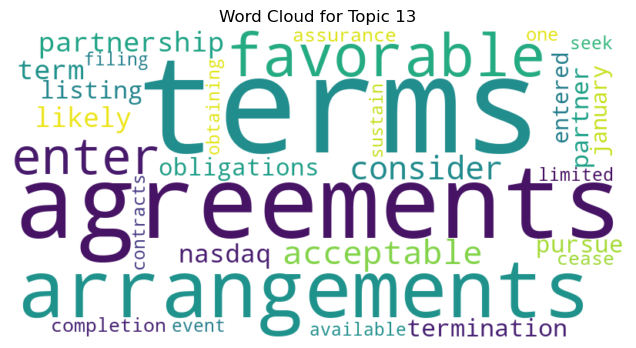

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


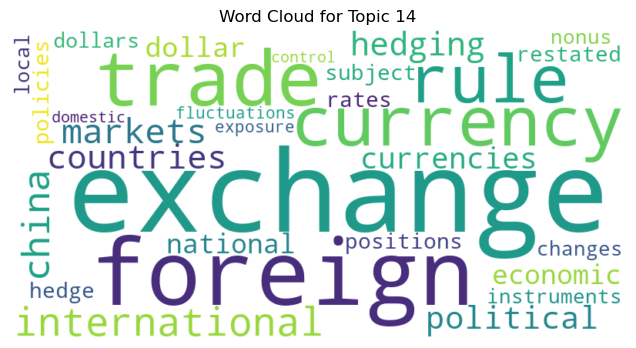

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


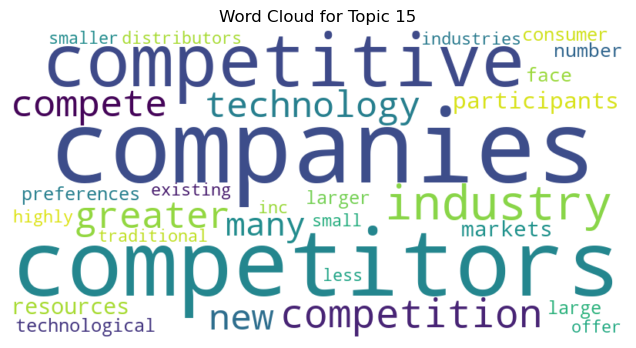

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


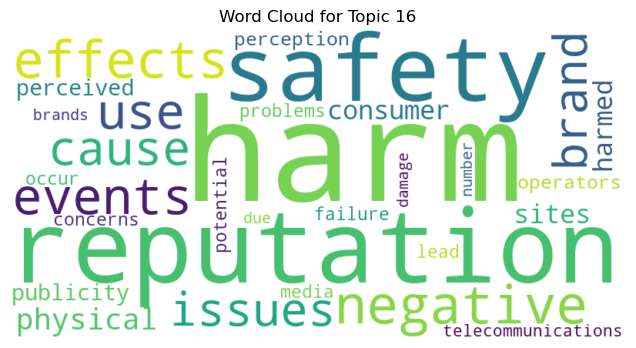

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


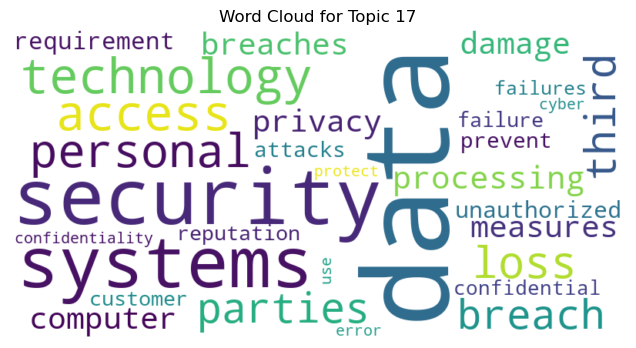

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


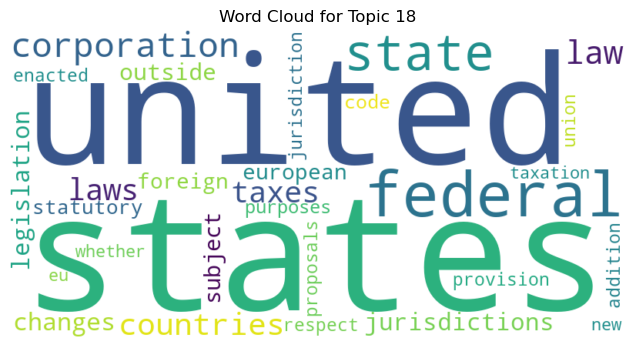

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


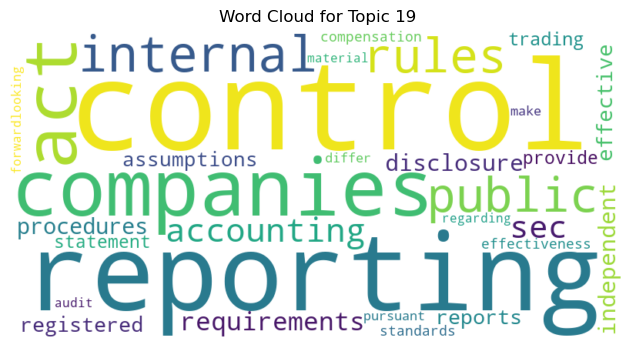

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


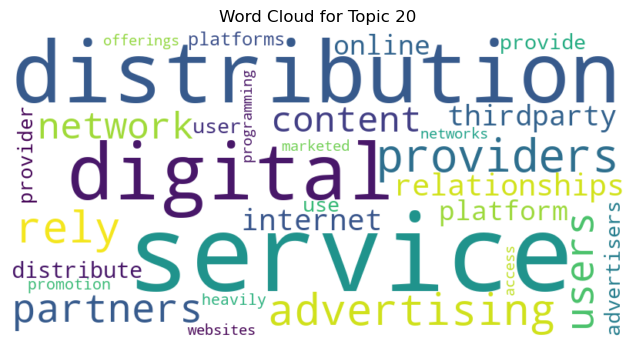

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


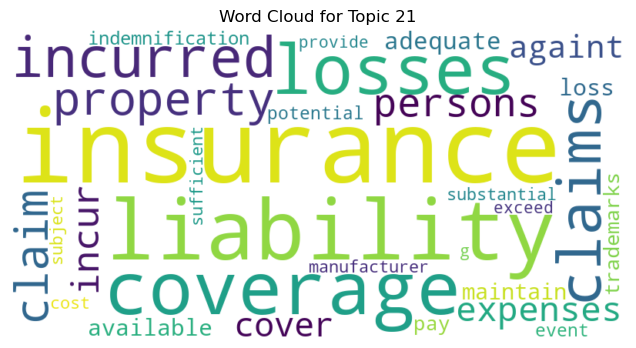

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


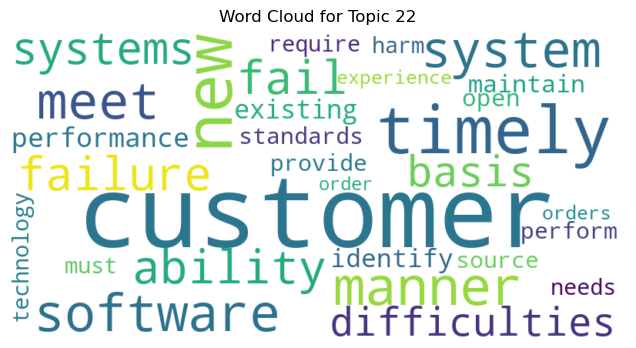

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


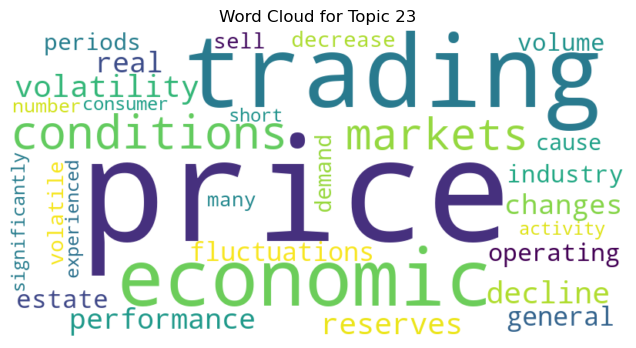

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


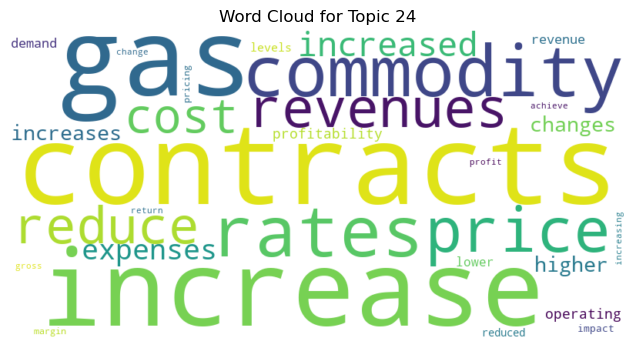

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


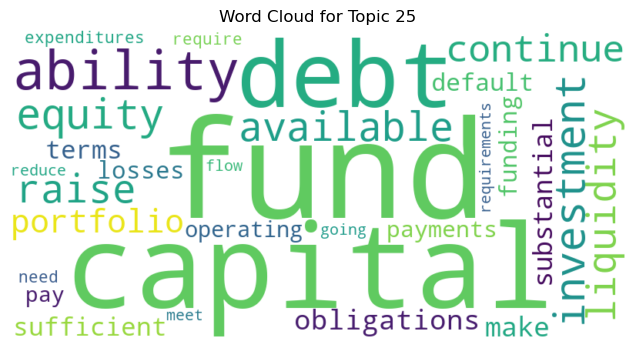

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


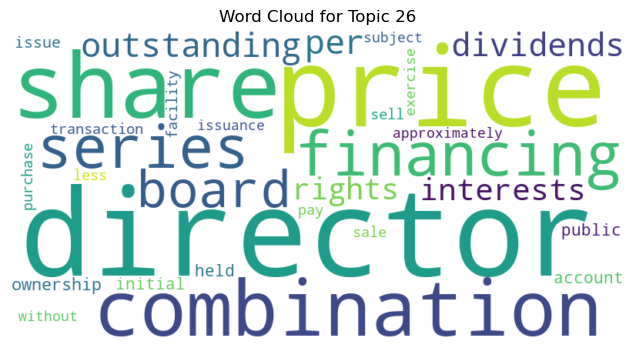

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


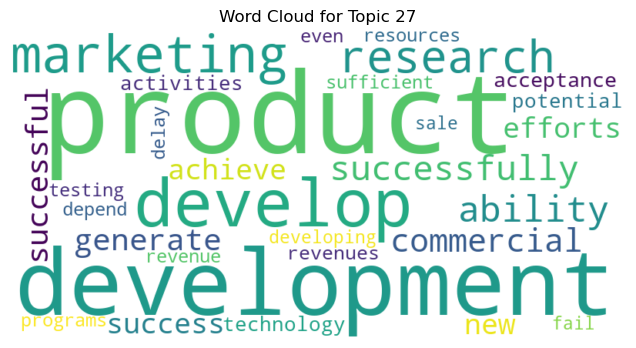

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


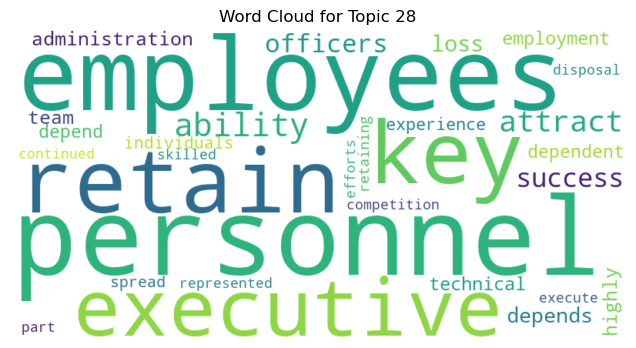

/Users/mousumi/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


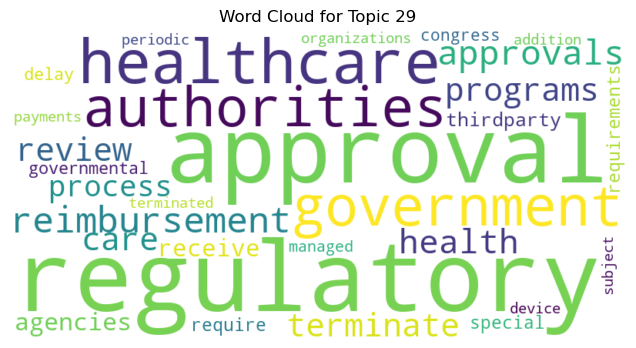

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Replace these with your LDA model and dictionary
lda_model = lda_model
dictionary = dictionary

# Define a function to generate and display a word cloud for a given topic
def generate_wordcloud_for_topic(topic_id, lda_model, dictionary):
    words = lda_model.show_topic(topic_id, topn=30)  # Adjust topn as needed
    word_freq = {word: prob for word, prob in words}

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white')

    # Generate the word cloud from the word frequency dictionary
    wordcloud.generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Topic {topic_id}")
    plt.axis("off")
    plt.show()

# Iterate over topics and generate word clouds for each
num_topics = lda_model.num_topics
for topic_id in range(0,num_topics):
    generate_wordcloud_for_topic(topic_id, lda_model, dictionary)